In [14]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sympy
from scipy.signal import firwin, lfilter
from tqdm import tqdm

**Lectura de señal**

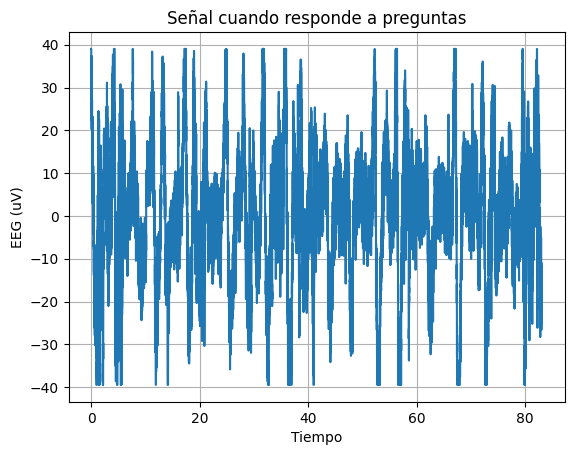

In [95]:
# Nombre del archivo de texto
#archivo = "/content/CesarBase.txt"
#archivo = "/content/cesar_pesta.txt"
archivo = "/content/cesar_preguntas.txt"

# Leer los datos del archivo y omitir las primeras 7 líneas
datos = np.loadtxt(archivo, skiprows=7)

# Extraer la columna de interés (columna 6)
senal = datos[:, 5]

num_muestra = np.arange(len(senal))
# Ganancia = 41782
senalV = (((senal/1024)-1/2)*3.3)/41782
senaluV = senalV*1000000
Fs = 1000 #frecuencia de muestreo
t = num_muestra/Fs
# Trazar la señal
plt.plot(num_muestra/1000, senaluV)
plt.xlabel('Tiempo')
plt.ylabel('EEG (uV)')
#plt.xlim([6,10])
#plt.title('Señal basal') #título
#plt.title('Señal cuando pestañea') #título
plt.title('Señal cuando responde a preguntas') #título

plt.grid(True)
plt.show()

**FFT de la señal**

(1024,)


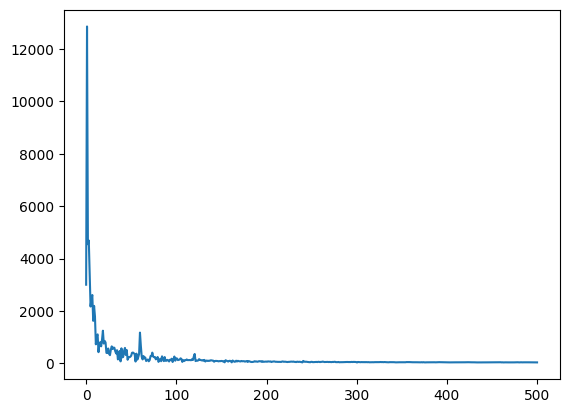

In [96]:
#FFT
N = 1024
X = np.fft.fft(senaluV,N)
print(X.shape)

X = X[0:(N//2)]
#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, Fs/2, N//2)
plt.plot(F,Xm)


**Filtro FIR**

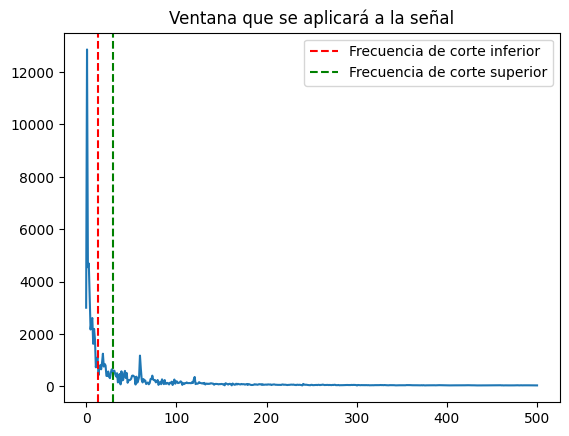

In [97]:
fs = 1000  # Frecuencia de muestreo
f_low = 13  # Frecuencia de corte inferior (Hz)
f_high = 30  # Frecuencia de corte superior (Hz)
numtaps = 101  # Longitud del filtro FIR

# Diseñar el filtro FIR pasabanda con la ventana de Hamming
taps = signal.firwin(numtaps, [f_low, f_high], pass_zero=False, fs=fs, window='hamming')

# Respuesta en frecuencia del filtro
w, h = signal.freqz(taps, 1, fs=fs)

# Líneas verticales para las frecuencias de corte
plt.plot(F,Xm)
plt.axvline(x=f_low, color='r', linestyle='--', label='Frecuencia de corte inferior')
plt.axvline(x=f_high, color='g', linestyle='--', label='Frecuencia de corte superior')
plt.legend()
plt.title("Ventana que se aplicará a la señal")
plt.show()

**Aplicación del filtro y se muestra cómo afecta a la frecuencia de la señal filtrada**



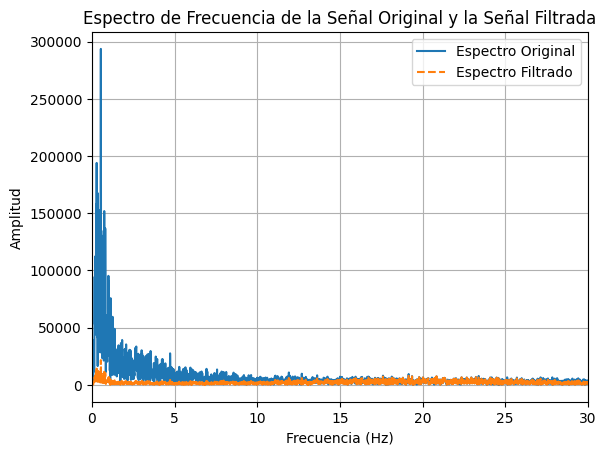

In [98]:
# Aplicar el filtro a la señal
y = signal.lfilter(taps, np.array(1), senaluV)
Y = np.fft.fft(y,N)

# Calcular la FFT de la señal original y la señal filtrada
fft_senal = np.fft.fft(senaluV)
fft_senal_filtrada = np.fft.fft(y)

# Definir las frecuencias
frequencies = np.fft.fftfreq(len(senal), 1/fs)

# Graficar el espectro de frecuencia
plt.figure()
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_senal)[:len(frequencies)//2], label='Espectro Original')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_senal_filtrada)[:len(frequencies)//2], label='Espectro Filtrado', linestyle='--')
plt.title('Espectro de Frecuencia de la Señal Original y la Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.xlim(0,30)
plt.grid()
plt.show()

**Ploteo de la señal**

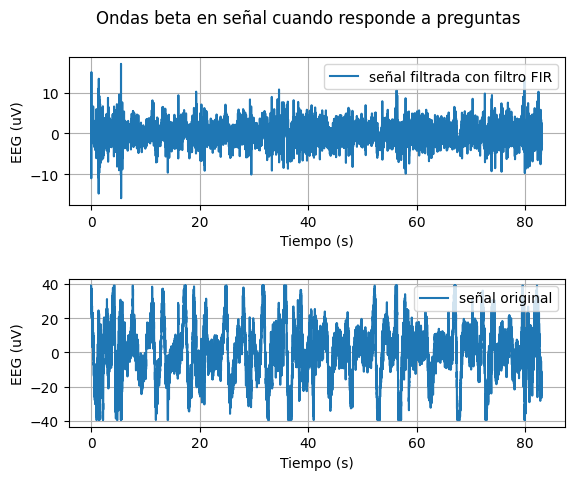

In [99]:
fig, ax = plt.subplots(2,1)
ax[0].plot(t,y, label="señal filtrada con filtro FIR")
ax[0].legend(loc="upper right")
ax[0].grid()
ax[0].set_ylabel("EEG (uV)")
ax[0].set_xlabel("Tiempo (s)")
ax[1].plot(t,senaluV, label="señal original")
ax[1].legend(loc="upper right")
ax[1].grid()
ax[1].set_xlabel("Tiempo (s)")
ax[1].set_ylabel("EEG (uV)")
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("Ondas beta en señal basal")
#fig.suptitle('Ondas beta en señal cuando pestañea') #título
fig.suptitle('Ondas beta en señal cuando responde a preguntas') #título
plt.show()